# **Tarea Nº 4**
Scope: APIs

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Piero Fernández Dávila y Rafael Vilca ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

In [1]:
import requests
import pandas as pd

def api_bcrp(codigos_series, periodo_inicial, periodo_final, formato_salida='json'):
    base = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/"

    url_api = f"{base}/{codigos_series}/{formato_salida}/{periodo_inicial}/{periodo_final}"

    print(url_api)

    response_bcrp_api = requests.get(url_api)

    if response_bcrp_api.status_code == 200:
        datos = response_bcrp_api.json()
        return datos
    else:
        print("response_bcrp_api.status_code")
        return None



In [2]:
#Colocamos inputs de la función
resultado = api_bcrp('PM04860AA', '1922', '2022')
resultado

https://estadisticas.bcrp.gob.pe/estadisticas/series/api//PM04860AA/json/1922/2022


{'config': {'title': 'Producto bruto interno y otros indicadores',
  'series': [{'name': 'Producto bruto interno y otros indicadores - PBI (millones S/ 2007)',
    'dec': '0'}]},
 'periods': [{'name': '1922', 'values': ['13308.2879214439']},
  {'name': '1923', 'values': ['14084.1651945108']},
  {'name': '1924', 'values': ['15427.8960488408']},
  {'name': '1925', 'values': ['15803.5741849635']},
  {'name': '1926', 'values': ['17335.8542937462']},
  {'name': '1927', 'values': ['17726.9594805686']},
  {'name': '1928', 'values': ['18743.0032731067']},
  {'name': '1929', 'values': ['20726.9203041303']},
  {'name': '1930', 'values': ['18612.2099858528']},
  {'name': '1931', 'values': ['17539.1910037525']},
  {'name': '1932', 'values': ['17155.1955702899']},
  {'name': '1933', 'values': ['18751.0067536708']},
  {'name': '1934', 'values': ['21000.7363824541']},
  {'name': '1935', 'values': ['22870.6725849653']},
  {'name': '1936', 'values': ['24029.0118717605']},
  {'name': '1937', 'values': [

In [3]:
#Convertimos la información extraida de la API a un dataframe
config = resultado["config"]
periodos = resultado["periods"]

# Extrae las columnas del DataFrame
columnas = ["name"] + [serie["name"] for serie in config["series"]]

# Inicializa un diccionario para almacenar los datos del DataFrame
datos_df = {columna: [] for columna in columnas}

# Llena el diccionario con los datos
for periodo in periodos:
    datos_df["name"].append(periodo["name"])
    for serie in config["series"]:
        nombre_serie = serie["name"]
        valores = periodo["values"]
        if nombre_serie not in datos_df:
            datos_df[nombre_serie] = []
        datos_df[nombre_serie].append(float(valores[0]))

# Crea el DataFrame
bcrp_df = pd.DataFrame(datos_df)

# Muestra el DataFrame
bcrp_df

,name,Producto bruto interno y otros indicadores - PBI (millones S/ 2007)
0,1922,13308.287921
1,1923,14084.165195
2,1924,15427.896049
3,1925,15803.574185
4,1926,17335.854294
...,...,...
96,2018,534665.000000
97,2019,546605.000000
98,2020,486402.086278
99,2021,552526.316008


## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

In [4]:
#Cambiarle de nombre a las columnas de bcrp_df

nuevos_nombres = {
    "name": "Año",
    "Producto bruto interno y otros indicadores - PBI (millones S/ 2007)": "PBI (millones S/ 2007)",
}

bcrp_df = bcrp_df.rename(columns=nuevos_nombres)

bcrp_df 

,Año,PBI (millones S/ 2007)
0,1922,13308.287921
1,1923,14084.165195
2,1924,15427.896049
3,1925,15803.574185
4,1926,17335.854294
...,...,...
96,2018,534665.000000
97,2019,546605.000000
98,2020,486402.086278
99,2021,552526.316008


In [5]:
import numpy as np

#Aplica logaritmo a los valores de la columna 'PBI (millones S/ 2007)'
bcrp_df['PBI_log'] = np.log(bcrp_df['PBI (millones S/ 2007)'])

bcrp_df

,Año,PBI (millones S/ 2007),PBI_log
0,1922,13308.287921,9.496142
1,1923,14084.165195,9.552806
2,1924,15427.896049,9.643933
3,1925,15803.574185,9.667991
4,1926,17335.854294,9.760532
...,...,...,...
96,2018,534665.000000,13.189396
97,2019,546605.000000,13.211482
98,2020,486402.086278,13.094791
99,2021,552526.316008,13.222256


In [6]:
#Calcular tasas de crecimiento y crear una nueva columna 'Tasa_Crecimiento_PBI'
bcrp_df['Tasa_Crecimiento_PBI'] = bcrp_df['PBI_log'].diff() * 100

bcrp_df

,Año,PBI (millones S/ 2007),PBI_log,Tasa_Crecimiento_PBI
0,1922,13308.287921,9.496142,NaN
1,1923,14084.165195,9.552806,5.666414
2,1924,15427.896049,9.643933,9.112617
3,1925,15803.574185,9.667991,2.405883
4,1926,17335.854294,9.760532,9.254073
...,...,...,...,...
96,2018,534665.000000,13.189396,3.899892
97,2019,546605.000000,13.211482,2.208604
98,2020,486402.086278,13.094791,-11.669080
99,2021,552526.316008,13.222256,12.746544


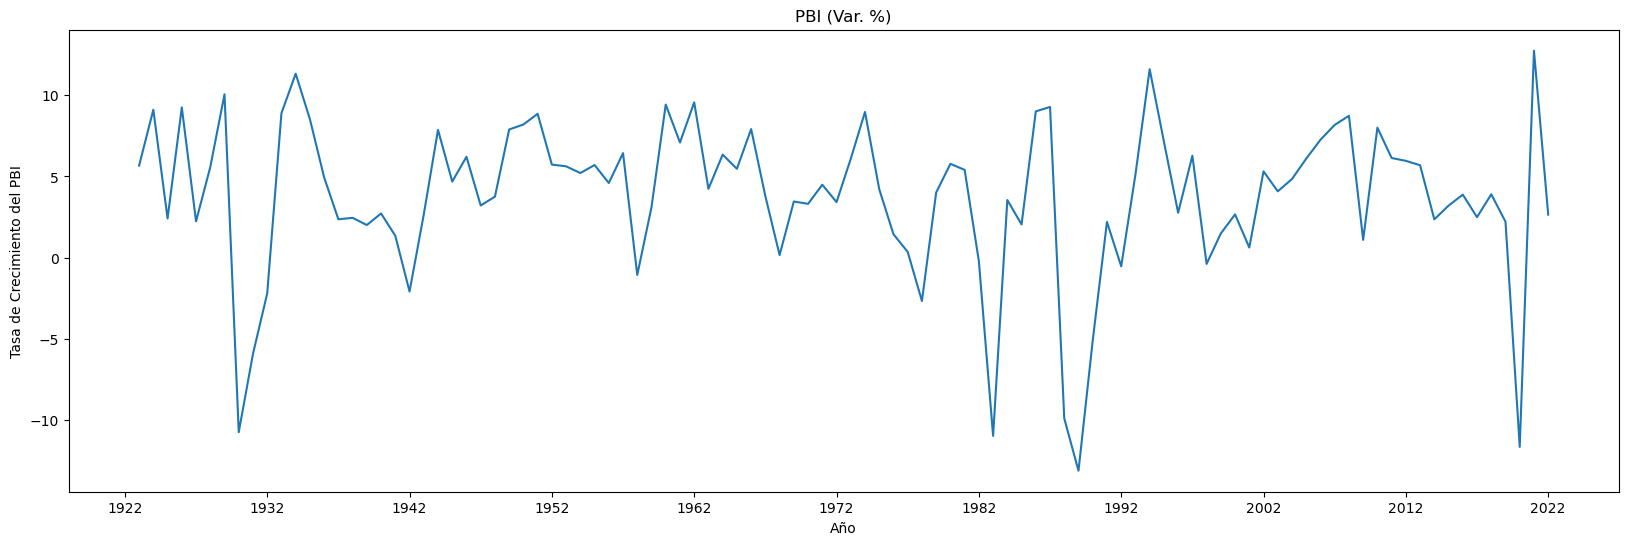

In [7]:
#Hacer un gráfico de la columna Tasa_Crecimiento_PBI
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(bcrp_df['Año'], bcrp_df['Tasa_Crecimiento_PBI'])
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento del PBI')
plt.title('PBI (Var. %)')
plt.xticks(bcrp_df['Año'][::10])
plt.show()

### La serie presenta un comportamiento estacionario, similar al comportamiento de un white noise. Además, se puede ver en el gráfico diferentes periodos de recesión como la gran depresión en 1929, la crisis inflacionaria de finales de la década de 1980 y la pandemia del covid 19. Otro detalle a notar es que a partir del nuevo milenio se visualiza una mayor estabilidad del ciclo económico.



## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended. 
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [8]:
# Solution
#Usamos la funcion programada en el ejercicio anterior para el API del BCRP
resultado1 = api_bcrp('PN01773AM', '2014-2', '2023-10')
resultado1

https://estadisticas.bcrp.gob.pe/estadisticas/series/api//PN01773AM/json/2014-2/2023-10


{'config': {'title': 'Producto bruto interno y demanda interna (índice 2007=100)',
  'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI Desestacionalizado - mensual',
    'dec': '1'}]},
 'periods': [{'name': 'Feb.2014', 'values': ['147.020255008332']},
  {'name': 'Mar.2014', 'values': ['145.958577773059']},
  {'name': 'Abr.2014', 'values': ['146.437612045345']},
  {'name': 'May.2014', 'values': ['145.581159463111']},
  {'name': 'Jun.2014', 'values': ['144.114406879532']},
  {'name': 'Jul.2014', 'values': ['145.855380943789']},
  {'name': 'Ago.2014', 'values': ['146.268045319806']},
  {'name': 'Sep.2014', 'values': ['146.77913459946']},
  {'name': 'Oct.2014', 'values': ['148.126328029226']},
  {'name': 'Nov.2014', 'values': ['147.298323752289']},
  {'name': 'Dic.2014', 'values': ['146.359636506492']},
  {'name': 'Ene.2015', 'values': ['148.002415756483']},
  {'name': 'Feb.2015', 'values': ['148.781506082573']},
  {'name': 'Mar.2015', 'values': ['149.88

In [9]:

#Ponemos información extraida en json en formato data frame.

config = resultado1["config"]
periodos = resultado1["periods"]

#Extrae las columnas del DataFrame
columnas = ["name"] + [serie["name"] for serie in config["series"]]

#Inicializa un diccionario para almacenar los datos del DataFrame
datos_df1 = {columna: [] for columna in columnas}

# Llena el diccionario con los datos
for periodo in periodos:
    datos_df1["name"].append(periodo["name"])
    for serie in config["series"]:
        nombre_serie = serie["name"]
        valores = periodo["values"]
        if nombre_serie not in datos_df1:
            datos_df1[nombre_serie] = []
        datos_df1[nombre_serie].append(float(valores[0]))

# Crea el DataFrame
bcrp_df1 = pd.DataFrame(datos_df1)

# Muestra el DataFrame
bcrp_df1

,name,Producto bruto interno y demanda interna (índice 2007=100) - PBI Desestacionalizado - mensual
0,Feb.2014,147.020255
1,Mar.2014,145.958578
2,Abr.2014,146.437612
3,May.2014,145.581159
4,Jun.2014,144.114407
...,...,...
112,Jun.2023,177.198427
113,Jul.2023,175.090688
114,Ago.2023,176.880905
115,Sep.2023,177.251736


In [10]:
#Cambiarle de nombre a las columnas de bcrp_df1

nuevos_nombres1 = {
    "name": "Mes.Año",
    "Producto bruto interno y demanda interna (índice 2007=100) - PBI Desestacionalizado - mensual": "PBI (2007=100)",
}

bcrp_df1 = bcrp_df1.rename(columns=nuevos_nombres1)

bcrp_df1 

,Mes.Año,PBI (2007=100)
0,Feb.2014,147.020255
1,Mar.2014,145.958578
2,Abr.2014,146.437612
3,May.2014,145.581159
4,Jun.2014,144.114407
...,...,...
112,Jun.2023,177.198427
113,Jul.2023,175.090688
114,Ago.2023,176.880905
115,Sep.2023,177.251736


In [11]:
#Dividir la columna 'Mes.Año' en dos columnas 'Mes' y 'Año'
bcrp_df1[['Mes', 'Año']] = bcrp_df1['Mes.Año'].str.split('.', expand=True)

#Cambiar los numeros de los meses a numeros
meses_numero = {
    'Ene': '01',
    'Feb': '02',
    'Mar': '03',
    'Abr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Ago': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dic': '12'
}

#crear la columna 'fecha' combinando el mes y el año
bcrp_df1['Mes'] = bcrp_df1['Mes'].map(meses_numero)
bcrp_df1['Fecha'] = pd.to_datetime(bcrp_df1['Año'].astype(str) + bcrp_df1['Mes'].astype(str), format='%Y%m')

#Eliminar columnas adicionales 
bcrp_df1 = bcrp_df1.drop(columns=['Mes', 'Año', 'Mes.Año'])



bcrp_df1


,PBI (2007=100),Fecha
0,147.020255,2014-02-01
1,145.958578,2014-03-01
2,146.437612,2014-04-01
3,145.581159,2014-05-01
4,144.114407,2014-06-01
...,...,...
112,177.198427,2023-06-01
113,175.090688,2023-07-01
114,176.880905,2023-08-01
115,177.251736,2023-09-01


In [12]:
#Calcular el promedio movil para toda la serie
pbi_promedio_movil_serie_completa = bcrp_df1['PBI (2007=100)'].rolling(window=12).mean()

pbi_promedio_movil_serie_completa = pbi_promedio_movil_serie_completa.to_frame(name='PBI (2020=100)')
pbi_promedio_movil_serie_completa = pbi_promedio_movil_serie_completa.dropna()
pbi_promedio_movil_serie_completa["Fecha"] = bcrp_df1["Fecha"]


feb_2020 = pbi_promedio_movil_serie_completa.loc[pbi_promedio_movil_serie_completa['Fecha'] == "2020-02-01", "PBI (2020=100)"].values[0]

#Normalizamos a feb2020 = 100 para toda la serie
pbi_promedio_movil_serie_completa["promedio_movil_normalizado"] = (pbi_promedio_movil_serie_completa['PBI (2020=100)']/feb_2020)*100
pbi_promedio_movil_serie_completa

#Separar el data frame por los datos antes de febrero 2020
datos_pre_pandemia = pbi_promedio_movil_serie_completa.head(62)

datos_pre_pandemia




,PBI (2020=100),Fecha,promedio_movil_normalizado
11,146.483440,2015-01-01,85.244642
12,146.630211,2015-02-01,85.330054
13,146.957369,2015-03-01,85.520440
14,147.461927,2015-04-01,85.814063
15,147.673896,2015-05-01,85.937416
...,...,...,...
68,170.516066,2019-10-01,99.230200
69,170.859815,2019-11-01,99.430241
70,170.970254,2019-12-01,99.494510
71,171.435997,2020-01-01,99.765544


                                OLS Regression Results                                
Dep. Variable:     promedio_movil_normalizado   R-squared:                       0.998
Model:                                    OLS   Adj. R-squared:                  0.998
Method:                         Least Squares   F-statistic:                 2.496e+04
Date:                        Sat, 13 Jan 2024   Prob (F-statistic):           2.56e-80
Time:                                11:55:16   Log-Likelihood:                 6.2185
No. Observations:                          62   AIC:                            -8.437
Df Residuals:                              60   BIC:                            -4.183
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

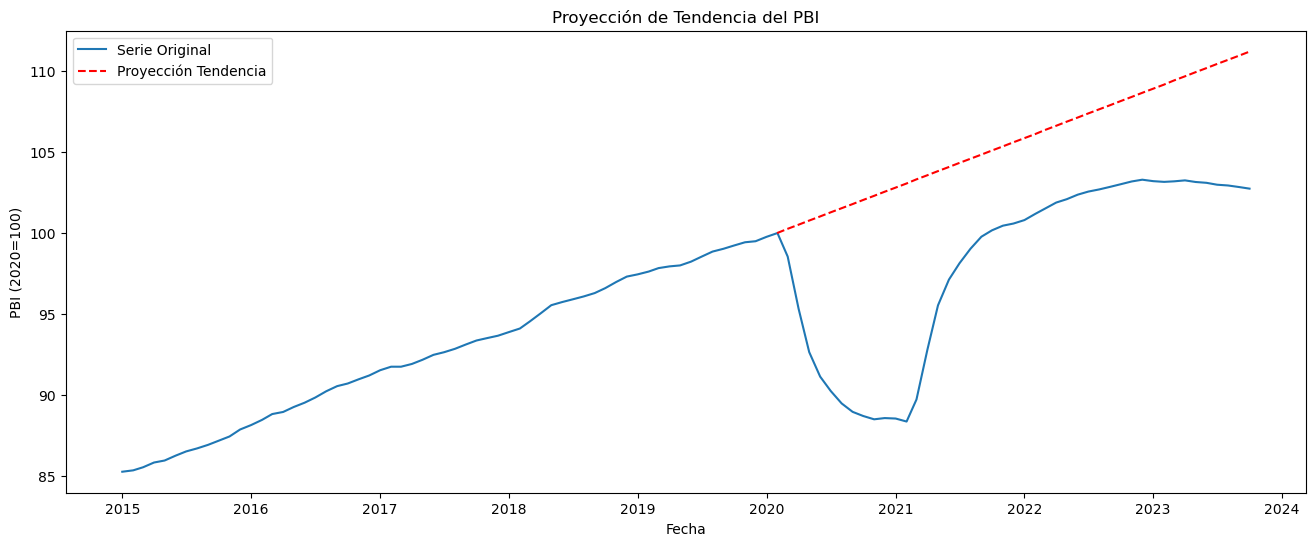

In [30]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Ajustar la regresión lineal simple para la tendencia
X_tendencia = sm.add_constant(datos_pre_pandemia.index)
y_tendencia = datos_pre_pandemia["promedio_movil_normalizado"]

#OLS
modelo_tendencia = sm.OLS(y_tendencia, X_tendencia)
resultado_tendencia = modelo_tendencia.fit()

print(resultado_tendencia.summary())



#Preparar datos para la proyección

fechas_proyeccion = pd.date_range(start='2020-01-01', end='2023-10-01', freq='M')

X_proyeccion = sm.add_constant(range(len(datos_pre_pandemia), len(datos_pre_pandemia) + len(fechas_proyeccion)))


#Predecir valores para la proyección
proyeccion = resultado_tendencia.predict(X_proyeccion)
proyeccion
#Normalizar proyeccion
proyeccion_normalizado = (proyeccion / proyeccion[0]) * 100
proyeccion_normalizado



# Graficar la serie original, el promedio móvil y la proyección

plt.figure(figsize=(16, 6))
plt.plot(pbi_promedio_movil_serie_completa['Fecha'], pbi_promedio_movil_serie_completa['promedio_movil_normalizado'], label='Serie Original')
plt.plot(fechas_proyeccion, proyeccion_normalizado, label='Proyección Tendencia', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('PBI (2020=100)')
plt.title('Proyección de Tendencia del PBI')
plt.legend()
plt.show()





### La brecha existente entre la serie original y la proyección se explica a partir de la crisis sanitaria por el covid 19 y las restricciones de movilidad impuestas por el gobierno peruano. Sin embargo, no se puede atribuir toda esa diferencia a la pandemia, pues otros eventos como la guerra entre Rusia y Ucrania, la inflación global, y fenómenos naturales como el fenómeno del Niño también impactaron negativamente al PBI y a su recuperación.

## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s 
`Ticker()`
- Hint2: some firms may not be paying dividends

In [41]:
import pandas as pd
#Reemplaza 'ruta_del_archivo.csv' con la ubicación real de tu archivo CSV
ruta_del_archivo = 'nasdaq_screener_1705167650610.csv'

#Cargamos el archivo csv 
stocks = pd.read_csv(ruta_del_archivo)
stocks

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$130.54,0.8600,0.663%,3.824876e+10,United States,1999.0,1285220,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$30.03,-0.8500,-2.753%,5.359511e+09,United States,2016.0,3933523,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$1.06,0.0400,3.922%,3.351950e+07,China,2008.0,3883,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$10.90,0.0000,0.00%,0.000000e+00,United States,2021.0,144,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.0181,-0.0059,-24.583%,0.000000e+00,United States,2021.0,12035,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...
7269,ZVRA,Zevra Therapeutics Inc. Common Stock,$5.92,-0.1100,-1.824%,2.144115e+08,United States,NaN,193146,Health Care,Biotechnology: Pharmaceutical Preparations
7270,ZVSA,ZyVersa Therapeutics Inc. Common Stock,$0.7536,-0.0566,-6.986%,9.369490e+05,United States,2022.0,196778,Health Care,Biotechnology: Pharmaceutical Preparations
7271,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$28.15,0.1500,0.536%,4.864617e+09,United States,2012.0,674125,Industrials,Industrial Machinery/Components
7272,ZYME,Zymeworks Inc. Common Stock,$10.88,-0.0900,-0.82%,7.616216e+08,United States,NaN,223893,Health Care,Biotechnology: Pharmaceutical Preparations


In [42]:
#Primero sumamos los sectores
total_market_cap_by_sector = stocks.groupby('Sector')['Market Cap'].sum()

#Los sectores más grandes
top_three_sectors = total_market_cap_by_sector.nlargest(3).index

#Las compañias más grandes en los 3 sectores más grandes
top_nine_companies = {}

for sector in top_three_sectors:
    sector_data = stocks[stocks['Sector'] == sector]
    top_nine_companies[sector] = sector_data.nlargest(3, 'Market Cap')[['Name', 'Market Cap', 'Symbol']]


    
type(top_nine_companies)
top_nine_companies

{'Technology':                                      Name    Market Cap Symbol
 16                Apple Inc. Common Stock  2.891568e+12   AAPL
 4348   Microsoft Corporation Common Stock  2.887211e+12   MSFT
 2921  Alphabet Inc. Class C Capital Stock  1.805308e+12   GOOG,
 'Consumer Discretionary':                               Name    Market Cap Symbol
 399   Amazon.com Inc. Common Stock  1.597848e+12   AMZN
 6598       Tesla Inc. Common Stock  6.958341e+11   TSLA
 6778                     Visa Inc.  4.849227e+11      V,
 'Finance':                                           Name    Market Cap Symbol
 3191           HSBC Holdings plc. Common Stock  7.755103e+11   HSBC
 3586        JP Morgan Chase & Co. Common Stock  4.887250e+11    JPM
 727   Bank of America Corporation Common Stock  2.595704e+11    BAC}

In [43]:
#Funcion para obtener datos de yf
import yfinance as yf
def get_market_data(symbol):
    try:
        data = yf.download(symbol, start='2022-01-01', end='2023-01-01') 
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

market_data_dict = {}

for sector, companies in top_nine_companies.items():
    for index, company in companies.iterrows():
        symbol = company['Symbol']
        market_data = get_market_data(symbol)
        
        if market_data is not None:
            market_data_dict[symbol] = market_data

for symbol, data in market_data_dict.items():
    print(f"\nMarket Data for {symbol}:")
    print(data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Market Data for AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669998   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943985   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056976   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225037   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  

Market Data for MSFT:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  335.350006  338.000000  329.779999  334.750000  328.727631   
2022-01-04  334.829987  335.200012  326.11999

In [46]:
# Funcion para extraer a los holders por empresa
def get_institutional_holders(symbol):
    try:
        company = yf.Ticker(symbol)
        holders = company.institutional_holders
        return holders
    except Exception as e:
        print(f"Error fetching institutional holders for {symbol}: {e}")
        return None

#Tabla para holders más común por empresa
institutional_holders_table = []

for sector, companies in top_nine_companies.items():
    for index, company in companies.iterrows():
        symbol = company['Symbol']
        institutional_holders = get_institutional_holders(symbol)
        
        if institutional_holders is not None:
            most_common_holder = institutional_holders['Holder'].mode().iloc[0]
                        
            institutional_holders_table.append({
                'Name': company['Name'],
                'Symbol': symbol,
                'Sector': sector,
                'MostCommonHolder': most_common_holder
            })

#Lista a DF
institutional_holders_df = pd.DataFrame(institutional_holders_table)

institutional_holders_df

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_uni

,Name,Symbol,Sector,MostCommonHolder
0,Apple Inc. Common Stock,AAPL,Technology,"Berkshire Hathaway, Inc"
1,Microsoft Corporation Common Stock,MSFT,Technology,Blackrock Inc.
2,Alphabet Inc. Class C Capital Stock,GOOG,Technology,Blackrock Inc.
3,Amazon.com Inc. Common Stock,AMZN,Consumer Discretionary,Blackrock Inc.
4,Tesla Inc. Common Stock,TSLA,Consumer Discretionary,Blackrock Inc.
5,Visa Inc.,V,Consumer Discretionary,Alliancebernstein L.P.
6,HSBC Holdings plc. Common Stock,HSBC,Finance,Bank of America Corporation
7,JP Morgan Chase & Co. Common Stock,JPM,Finance,Bank of America Corporation
8,Bank of America Corporation Common Stock,BAC,Finance,"Berkshire Hathaway, Inc"


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


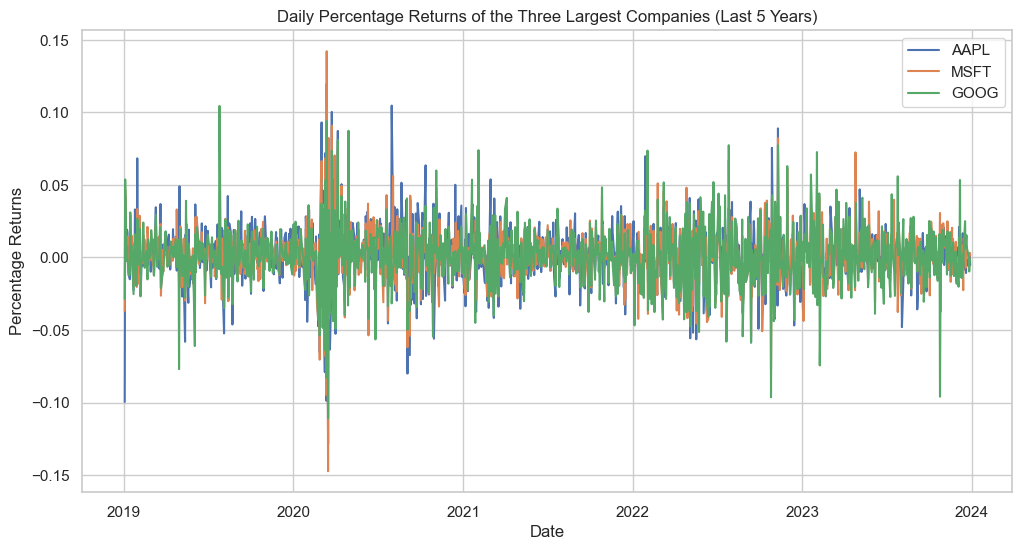

In [47]:
import matplotlib.pyplot as plt

historical_data = {}

for index, row in stocks.nlargest(3, 'Market Cap').iterrows():
    symbol = row['Symbol']
    company_data = yf.download(symbol, start='2019-01-01', end='2024-01-01') 
    historical_data[symbol] = company_data

#Porcentajes diarios de retornos
returns_data = {}

for symbol, data in historical_data.items():
    data['Daily_Return'] = data['Adj Close'].pct_change()
    returns_data[symbol] = data['Daily_Return'].dropna()

#Grafico sobre retornos
plt.figure(figsize=(12, 6))

for symbol, returns in returns_data.items():
    plt.plot(returns.index, returns, label=symbol)

plt.title('Daily Percentage Returns of the Three Largest Companies (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.legend()
plt.show()